In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
cv2.__version__

'3.2.0'

In [3]:
im_train = cv2.imread("../data/sealion/Train/32.jpg")
im_dotted = cv2.imread("../data/sealion/TrainDotted/32.jpg")

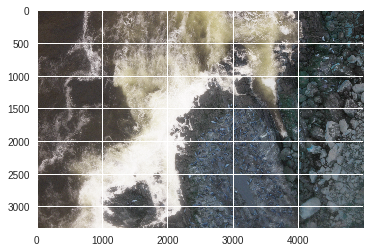

In [4]:
plt.imshow(im_train)

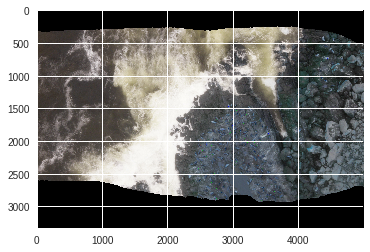

In [5]:
plt.imshow(im_dotted)

In [6]:
hsv = cv2.cvtColor(im_train, cv2.COLOR_BGR2HSV)

HSV conversion with openCV:
- H = 2*p[0] (to get H in 0 - 360)
- S = p[1] / 255 * 100 (to get S in 0 - 100)
- V = p[2] / 255 * 100 (to get V in 0 - 100)

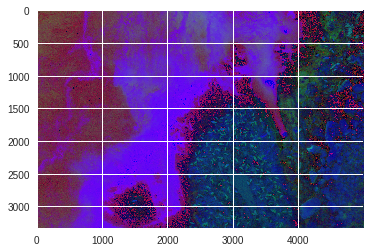

In [7]:
plt.imshow(hsv)

In [8]:
d = cv2.absdiff(im_train, im_dotted)

In [9]:
ds = np.sum(d, axis=2)/3

In [10]:
ds[1200:1400, 1200:1400]

array([[ 3.33333333,  1.        ,  1.66666667, ...,  2.66666667,
         4.        ,  0.        ],
       [ 1.33333333,  1.33333333,  1.33333333, ...,  0.        ,
         2.        ,  4.        ],
       [ 2.        ,  1.33333333,  2.        , ...,  2.        ,
         4.        ,  1.33333333],
       ..., 
       [ 2.66666667,  4.33333333,  3.        , ...,  2.        ,
         3.        ,  1.        ],
       [ 2.        ,  1.66666667,  1.33333333, ...,  1.        ,
         1.        ,  1.        ],
       [ 2.33333333,  2.33333333,  3.33333333, ...,  3.66666667,
         1.66666667,  1.66666667]])

In [11]:
ds = ds.astype(np.uint8)

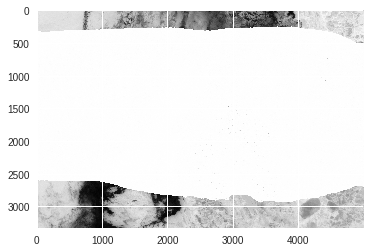

In [12]:
plt.imshow(ds)

In [13]:
g = d[1000:1200, 1000:1200, :]

In [14]:
np.sum(g, axis=2)/3

array([[ 2.        ,  0.        ,  2.        , ...,  1.66666667,
         3.33333333,  4.        ],
       [ 1.        ,  3.        ,  3.        , ...,  1.        ,
         1.33333333,  1.        ],
       [ 0.66666667,  0.66666667,  3.        , ...,  1.        ,
         3.33333333,  0.66666667],
       ..., 
       [ 4.        ,  1.        ,  1.        , ...,  1.66666667,
         0.33333333,  1.66666667],
       [ 2.33333333,  1.        ,  2.        , ...,  0.66666667,
         1.33333333,  1.33333333],
       [ 1.        ,  1.        ,  1.        , ...,  2.        ,
         1.33333333,  1.33333333]])

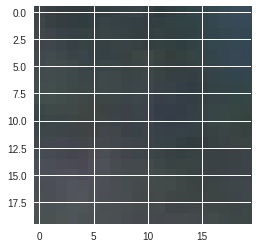

In [15]:
plt.imshow(d[-20:, -20:, :])

In [16]:
def detect_red_dots(im_bgr, im_dotted_bgr):
    im_dotted_hsv = cv2.cvtColor(im_dotted_bgr, cv2.COLOR_BGR2HSV)
    hue_red_max = 10
    hue_red_min = 170
    sat_red_min = 230
    sat_red_max = 255
    value_red_min = 230
    value_red_max = 255
    threshold_diff = 15
    diff_dotted_bgr = cv2.absdiff(im_train, im_dotted)
    diff_dotted_gray = np.sum(diff_dotted_bgr, axis=2)/3
    diff_dotted_mask = diff_dotted_gray > threshold_diff
    
    red_candidates = \
        np.logical_and(
            np.logical_and(
                np.logical_or(
                    im_dotted_hsv[:, :, 0] >= hue_red_min,
                    im_dotted_hsv[:, :, 0] <= hue_red_max),
                np.logical_and(
                    im_dotted_hsv[:, :, 1] >= sat_red_min,
                    im_dotted_hsv[:, :, 1] <= sat_red_max)
            ),
            np.logical_and(
                im_dotted_hsv[:, :, 2] >= value_red_min,
                im_dotted_hsv[:, :, 2] <= value_red_max)
        )
    diff_and_red = np.logical_and(diff_dotted_mask, red_candidates)
    return diff_and_red

In [17]:
red_mask = detect_red_dots(im_train, im_dotted)

In [18]:
red_mask_u8 = (red_mask * 255).astype(np.uint8)

In [19]:
n_labels, im_labels, stats, centroids = cv2.connectedComponentsWithStats(red_mask_u8, connectivity=4)

In [20]:
stats = stats[1:]

In [21]:
stats

array([[4378,  442,    4,    6,   16],
       [4431,  736,    4,    4,   15],
       [2922, 1470,    4,    4,   12],
       [3247, 1507,    4,    5,   13],
       [2687, 1707,    4,    5,   18],
       [2981, 1759,    4,    4,   13],
       [2829, 1818,    4,    6,   15],
       [3531, 1885,    5,    4,   16],
       [2588, 2048,    5,    5,   15],
       [3067, 2107,    5,    5,   21],
       [3338, 2268,    4,    4,   12],
       [2896, 2364,    5,    4,   18],
       [3125, 2493,    4,    4,   14],
       [3434, 2514,    4,    4,   12],
       [2329, 2532,    4,    4,   12],
       [3227, 2639,    5,    4,   16],
       [4270, 2733,    4,    4,   11],
       [2502, 2837,    4,    4,   13]], dtype=int32)

In [22]:
for s in stats:
    cv2.rectangle(im_dotted, (s[0], s[1]), (s[0] + s[2], s[1] + s[3]), (255, 0, 0), 1, cv2.LINE_AA)

In [23]:
cv2.imwrite("../data/sealion/try002.png", im_dotted)

True

In [122]:
im_train_small = im_train[1700:2000, 3000:3300,:]

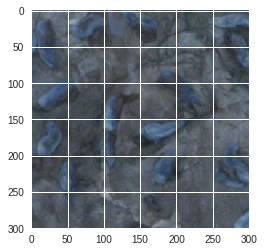

In [123]:
plt.imshow(im_train_small)

In [124]:
im_train_small

array([[[ 94, 103, 116],
        [ 96, 105, 118],
        [100, 109, 122],
        ..., 
        [ 72,  81,  95],
        [ 74,  82,  99],
        [ 76,  84, 101]],

       [[ 94, 103, 117],
        [ 94, 105, 119],
        [ 98, 109, 123],
        ..., 
        [ 69,  78,  92],
        [ 72,  80,  97],
        [ 74,  82,  99]],

       [[ 95, 103, 120],
        [ 95, 105, 122],
        [ 98, 109, 123],
        ..., 
        [ 69,  78,  92],
        [ 73,  82,  96],
        [ 76,  85,  99]],

       ..., 
       [[ 75,  77,  85],
        [ 74,  76,  84],
        [ 74,  76,  84],
        ..., 
        [ 85, 110, 142],
        [ 84, 112, 142],
        [ 86, 116, 145]],

       [[ 74,  76,  84],
        [ 73,  75,  83],
        [ 72,  74,  82],
        ..., 
        [ 81, 107, 137],
        [ 81, 111, 140],
        [ 84, 116, 145]],

       [[ 73,  75,  83],
        [ 73,  75,  83],
        [ 73,  74,  84],
        ..., 
        [ 80, 106, 136],
        [ 81, 111, 140],
        [ 85, 119,

In [131]:
def normalize(im):
    n_channels = im.shape[2]
    im_normed = im.copy()
    
    for c in range(n_channels):
        min_channel = np.min(im[:,:,c])
        max_channel = np.max(im[:,:,c])
        a = 255.0/(max_channel - min_channel)
        b = -a * min_channel
        im_normed[:,:,c] = (a * im[:,:,c] + b).astype(np.uint8)
        
    return im_normed

In [132]:
im_normed = normalize(im_train_small)

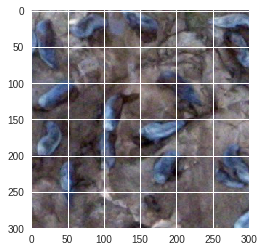

In [134]:
plt.imshow(im_normed)

In [135]:
cv2.imwrite("../data/small.png", im_train_small)
cv2.imwrite("../data/small_normed.png", im_normed)

True

In [159]:
a = cv2.ximgproc.createSuperpixelSLIC(im_normed, cv2.ximgproc.SLICO, 10, 10.0)

In [160]:
a.iterate(20)

In [161]:
a.getNumberOfSuperpixels()

885

In [144]:
b = ((a.getLabelContourMask() == 0) * 255).astype(np.uint8)

In [145]:
g = cv2.bitwise_and(im_normed,im_normed,mask = b)

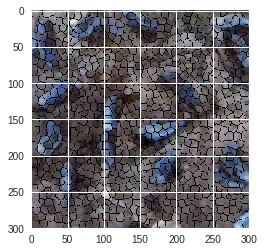

In [146]:
plt.imshow(g)

In [141]:
cv2.imwrite("../data/try_slico.png", g)

True

In [153]:
a = cv2.ximgproc.createSuperpixelLSC(im_normed, 10, 0.075)

In [154]:
a.iterate(100)

In [155]:
b = ((a.getLabelContourMask() == 0) * 255).astype(np.uint8)

In [156]:
g = cv2.bitwise_and(im_normed,im_normed,mask = b)

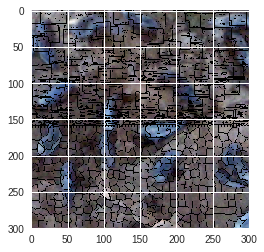

In [157]:
plt.imshow(g)

In [158]:
cv2.imwrite("../data/try_LSC.png", g)

True

In [193]:
a = cv2.ximgproc.createSuperpixelSEEDS(im_normed.shape[1], im_normed.shape[0], im_normed.shape[2], 1000, 10, 2, 10, True)

In [194]:
a.iterate(im_normed, 50)

In [195]:
b = ((a.getLabelContourMask() == 0) * 255).astype(np.uint8)

In [196]:
g = cv2.bitwise_and(im_normed,im_normed,mask = b)

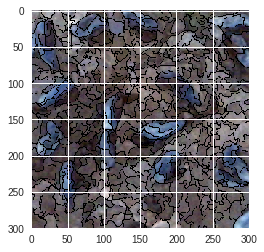

In [197]:
plt.imshow(g)

In [198]:
cv2.imwrite("../data/try_SEED.png", g)

True